In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
dataset=pd.read_csv('/content/delivery_time.csv')

In [ ]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


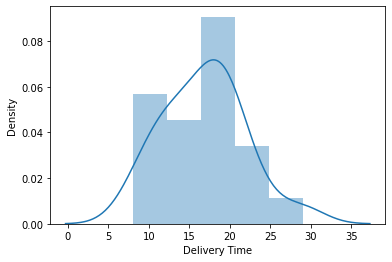

In [ ]:
sns.distplot(dataset['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


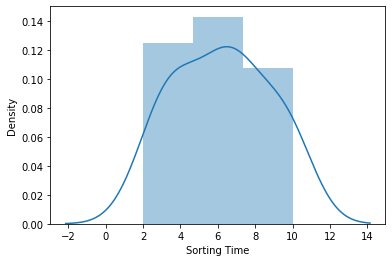

In [ ]:
sns.distplot(dataset['Sorting Time'])

**Feature Engineering**

In [ ]:
dataset=dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Correlation Analysis**

In [ ]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


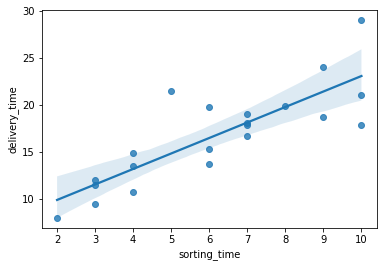

In [ ]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

**Model Building**

In [ ]:
dataset['logarithm_base2'] = np.log2(dataset['delivery_time'])

In [ ]:
dataset

,delivery_time,sorting_time,logarithm_base2
0,21.00,10,4.392317
1,13.50,4,3.754888
2,19.75,6,4.303781
3,24.00,9,4.584963
4,29.00,10,4.857981
5,15.35,6,3.940167
6,19.00,7,4.247928
7,9.50,3,3.247928
8,17.90,10,4.161888
9,18.75,9,4.228819


In [ ]:
dataset['logarithm_base2'] = np.log2(dataset['sorting_time'])

In [ ]:
dataset

,delivery_time,sorting_time,logarithm_base2
0,21.00,10,3.321928
1,13.50,4,2.000000
2,19.75,6,2.584963
3,24.00,9,3.169925
4,29.00,10,3.321928
5,15.35,6,2.584963
6,19.00,7,2.807355
7,9.50,3,1.584963
8,17.90,10,3.321928
9,18.75,9,3.169925


In [ ]:
# applying sqrt() method on integer numbers 
arr1 = np.sqrt([1, 4, 9, 16])
arr2 = np.sqrt([6, 10, 18])

In [ ]:
print("square-root of an array1  : ", arr1)
print("square-root of an array2  : ", arr2)

square-root of an array1  :  [1. 2. 3. 4.]
square-root of an array2  :  [2.44948974 3.16227766 4.24264069]


In [ ]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

**Model Testing**

In [ ]:
#finding coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
# finding tvalue and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:

#finding Rsquared Values
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

**Model prediction**

In [ ]:
#Manual prediction for say sorting time 5
delivery_time =(6.582734)+(1.649020)*(5)
delivery_time

14.827834

In [ ]:
# Automatic prediction for say sorting time 5,8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [ ]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64